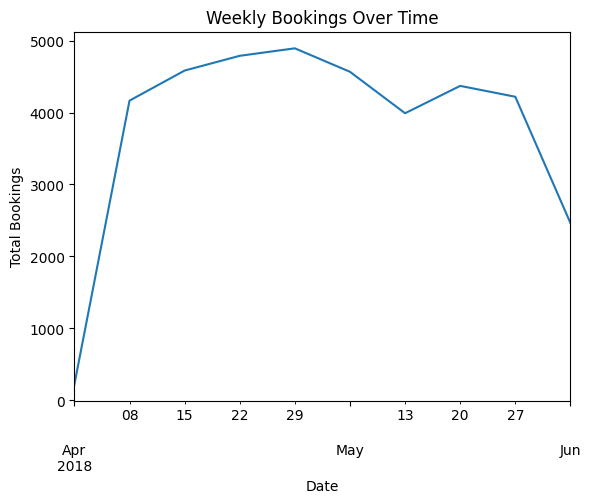

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('cleaned_data.xlsx')

df['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)'])


df.set_index('BookingEndDateTime (Month / Day / Year)', inplace=True)


weekly_bookings = df['Number Booked'].resample('W').sum()


weekly_bookings.plot()
plt.title('Weekly Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bookings')
plt.show()

In [ ]:



from prophet import Prophet


prophet_df = weekly_bookings.reset_index()
prophet_df.columns = ['ds', 'y']


train = prophet_df[:-4]
validation = prophet_df[-4:]


model = Prophet()
model.fit(train)


future = model.make_future_dataframe(periods=4, freq='W')
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpreqro5yi/tusen4qo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpreqro5yi/_8n3onyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50297', 'data', 'file=/tmp/tmpreqro5yi/tusen4qo.json', 'init=/tmp/tmpreqro5yi/_8n3onyx.json', 'output', 'file=/tmp/tmpreqro5yi/prophet_modelgwijj6np/prophet_model-20250904061914.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:19:14 - cmdstanpy - INFO - Chain [1] start processing
IN

Mean Absolute Error (MAE): 3539.68
Mean Squared Error (MSE): 14508102.90


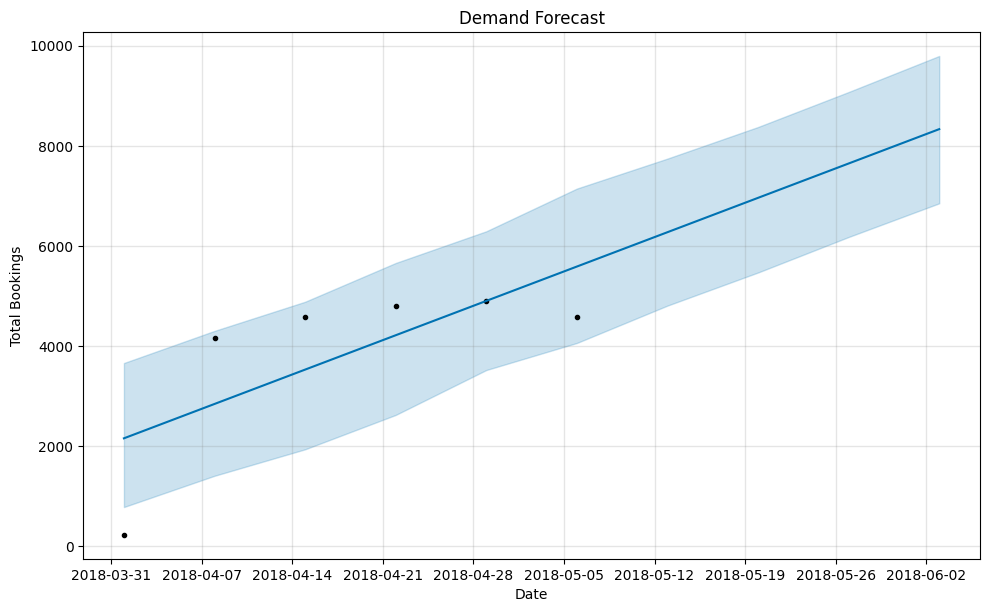

In [ ]:

actual_values = validation['y'].values

forecasted_values = forecast['yhat'][-4:].values


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


model.plot(forecast)
plt.title('Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Total Bookings')
plt.show()

In [ ]:

from prophet import Prophet


model = Prophet()
model.fit(prophet_df)


future = model.make_future_dataframe(periods=4, freq='W')

forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpreqro5yi/o_bsmgtb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpreqro5yi/v4l3oy42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95717', 'data', 'file=/tmp/tmpreqro5yi/o_bsmgtb.json', 'init=/tmp/tmpreqro5yi/v4l3oy42.json', 'output', 'file=/tmp/tmpreqro5yi/prophet_model20nmo1gl/prophet_model-20250904062008.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:20:08 - cmdstanpy - INFO - Chain [1] start processing
IN

Mean Absolute Error (MAE): 757.88
Mean Squared Error (MSE): 1284259.09


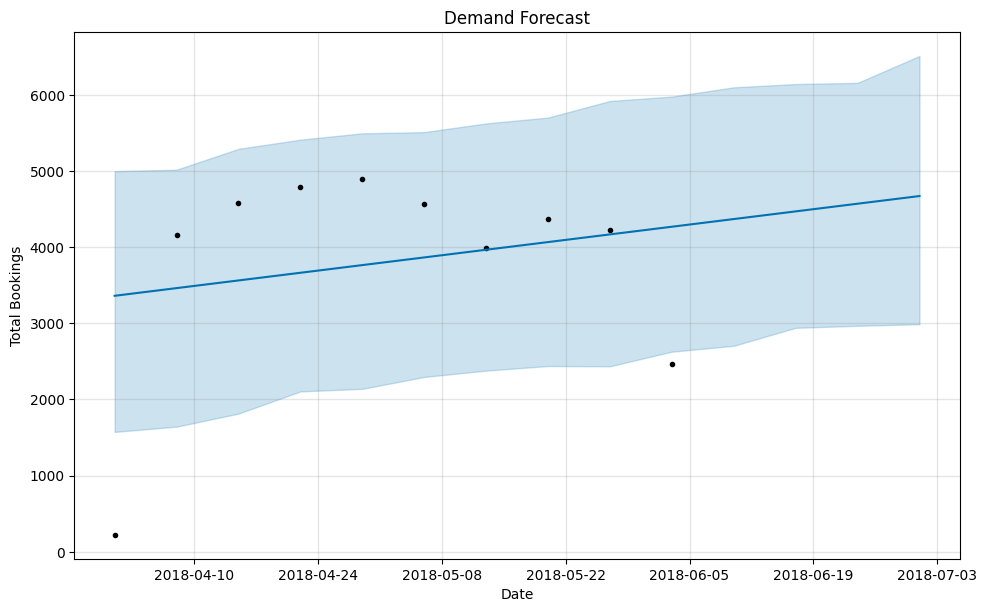

In [ ]:

actual_values = validation['y'].values
forecasted_values = forecast['yhat'][-4:].values


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

model.plot(forecast)
plt.title('Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Total Bookings')
plt.show()
